In [1]:
import os
import pandas as pd
import numpy as np
from configs.configuration import Config
from sklearn.metrics.pairwise import cosine_similarity
import cv2

from utils.get_data import get_npy
from utils.top_k_accuracy import accuracy

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from glob import glob
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
from model.resnet18 import ResNet18

In [4]:
config = Config(os.path.join(os.getcwd(), "configs/resnet18_mcpl_ranlars_tau.yaml"))
Embedding = pd.read_csv(config.embed.path, index_col=0)

---------------------------------- APP CONFIG ----------------------------------
model: 
  name: resnet18_mcpl_ranlars
  pretrain: False
zero_shot: False
embed: 
  path: data/embed/Embedding_tc_0.5_0.001_0.5.csv
loss: 
  name: MCPL3
  tau: 10
train: 
  source: data/cha_table/tc_cha_4808.txt
  folder: data/TCHandwriting/cleaned_data/img_erode_aug_npy2
  optim: ralars
  lr: 0.005
  max_epoch: 100
  batch_size: 512
  data_shuffle: True
test: 
  source: cha_table/cha_test-Copy1.txt
  folder: data/TCHandwriting/cleaned_data/img_erode_aug_npy2
  batch_size: 512
  data_shuffle: False
aug: 
  aug_func: False
  train_amplify: 5
  test_amplify: 1
--------------------------------------------------------------------------------


In [5]:
def infer(imgs):
    
    imgs = imgs/255
    imgs = torch.tensor(imgs, dtype=torch.float)
    imgs = Variable(imgs.cuda())
    imgs = torch.unsqueeze(imgs, 1)
    
    pred_y = model(imgs)
    return pred_y.cpu().detach().numpy()

In [6]:
model = ResNet18(out_dim=301).cuda()

### reload weights
checkpoint = torch.load('save/model_resnet18_mcpl_ralars_tau.h5')
model.load_state_dict(checkpoint['model_state_dict'])

with torch.no_grad():
    model.eval()

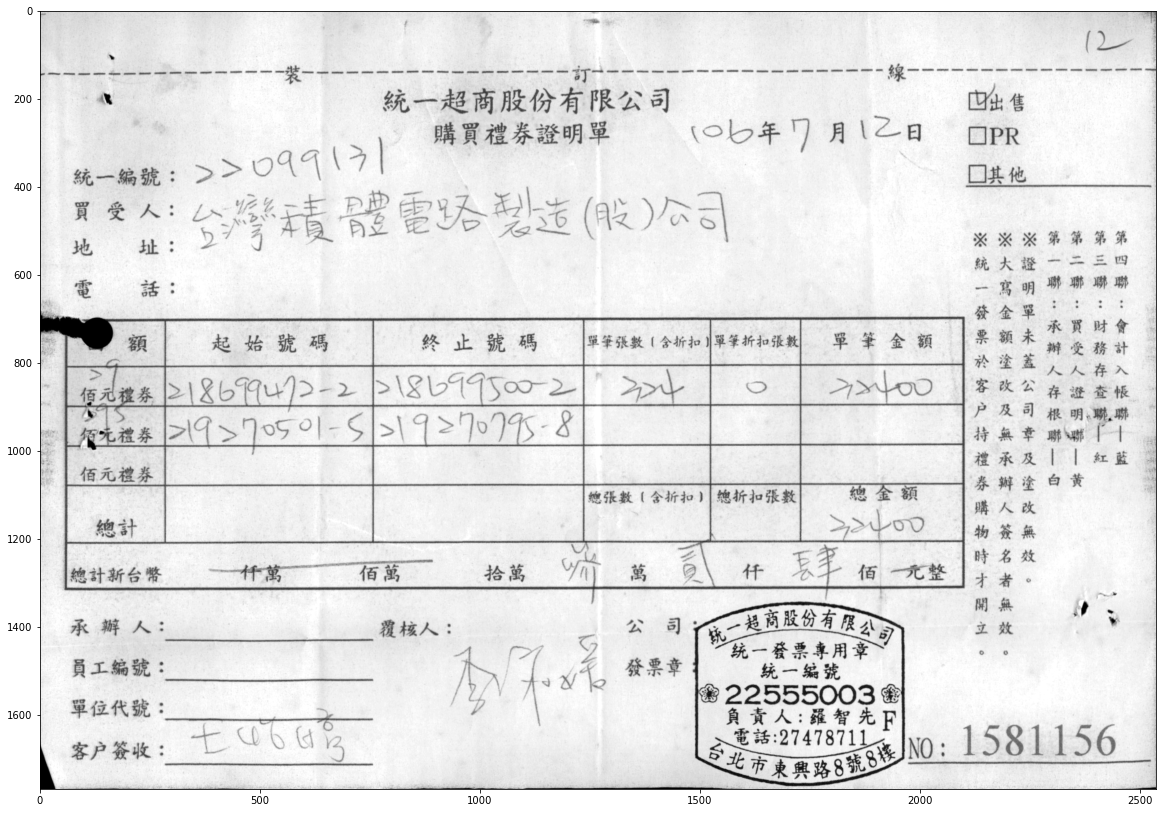

In [7]:
img = cv2.imread('data/crop3/tsmc-sample-invoices_Invoice_JPEG_Gray_HW_TC_Invoice_ (5).jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.show()

['體' '骨' '膿' '曲' '髓' '髏' '骰' '禮' '登' '骼']


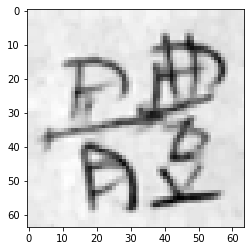

['積' '責' '禾' '稅' '秒' '禿' '素' '秋' '稱' '稻']


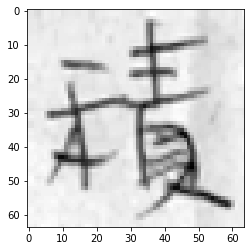

['造' '迦' '迢' '避' '遴' '迴' '遐' '述' '迺' '逞']


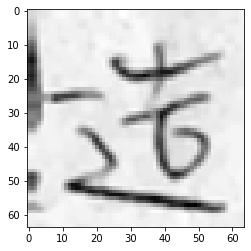

['路' '各' '咯' '趾' '咚' '啃' '跆' '咎' '喀' '品']


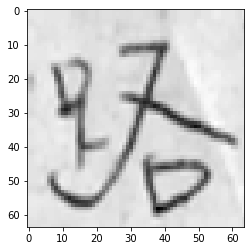

['薑' '舉' '蒙' '菱' '羊' '莖' '奉' '蕪' '雨' '霽']


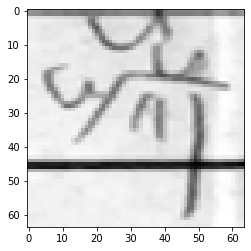

['灣' '彎' '灤' '弼' '瀰' '泓' '粥' '弓' '沸' '潦']


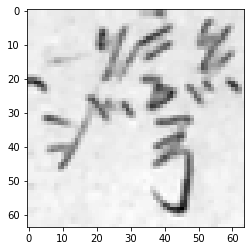

['雨' '需' '丙' '甭' '雲' '雯' '霎' '童' '羊' '晝']


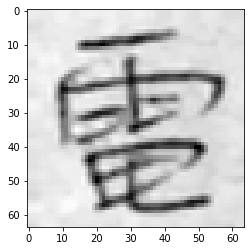

['盆' '分' '父' '益' '血' '貧' '盞' '盔' '盈' '盛']


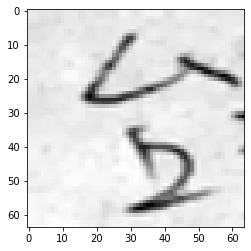

['貳' '或' '氛' '勻' '氧' '武' '式' '氮' '裁' '氯']


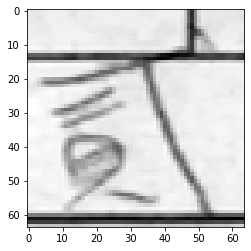

['裂' '梨' '製' '礬' '稟' '剖' '型' '前' '棠' '到']


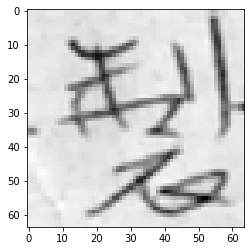

['公' '八' '牟' '台' '允' '么' '弁' '矣' '私' '去']


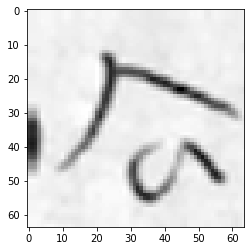

['股' '朋' '月' '肢' '服' '骰' '腎' '又' '脯' '朧']


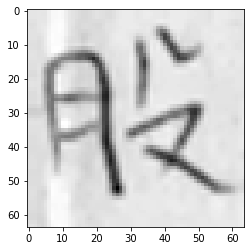

['司' '刁' '局' '刀' '可' '召' '氛' '哥' '羽' '勻']


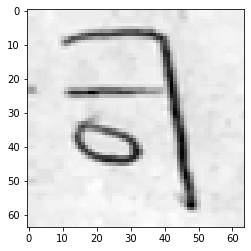

['肆' '聿' '秉' '爽' '冊' '肄' '畢' '吏' '卅' '耒']


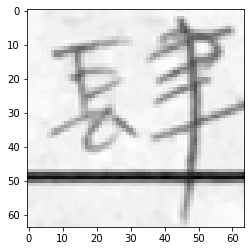

In [8]:
crops_path = glob('data/crop3/*.png')

imgs = []
raw_imgs = []
kernel = np.ones((2,2),np.uint8)

for path in crops_path:
    crop = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    raw_imgs.append(crop)
    
    # erosion & dilation
    crop = cv2.erode(crop, kernel, iterations = 1)
    crop = cv2.dilate(crop, kernel, iterations = 1)
    # erosion = cv2.medianBlur(crop, 3)

    resImg = cv2.resize(crop, (64,64), interpolation=cv2.INTER_CUBIC)
    imgs.append(resImg)
    


pred_y = infer(np.array(imgs))

pred_y = np.vstack(pred_y)
score = cosine_similarity(pred_y, Embedding.values.T)
top_score = score.argsort()[:,::-1][:,:10]

for idx, n in enumerate(pred_y):
    print(Embedding.columns[top_score][idx])
#     plt.imshow(raw_imgs[idx], cmap='gray')
#     plt.show()
    
    plt.imshow(imgs[idx], cmap='gray')
    plt.show()

['王' '士' '土' '圭' '堊' '至' '三' '主' '辛' '丕']


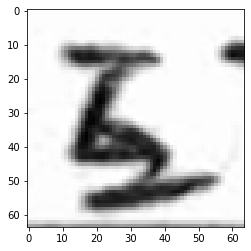

['疵' '癥' '癩' '癮' '痢' '癲' '癬' '痲' '瘀' '癖']


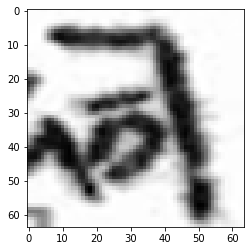

['體' '骨' '髓' '豆' '膿' '登' '豎' '骰' '髏' '豌']


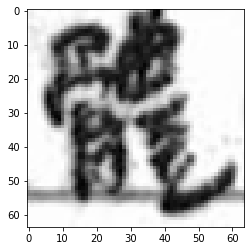

['聶' '聳' '聱' '聾' '聲' '子' '孳' '耳' '聆' '學']


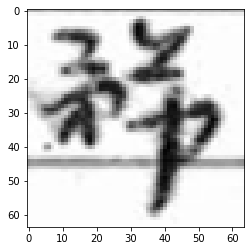

['皮' '入' '彼' '被' '川' '頗' '皰' '皴' '波' '披']


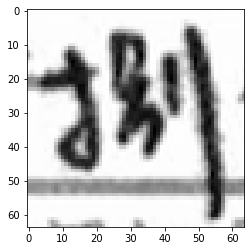

['述' '邏' '邂' '遐' '遊' '遜' '遨' '逛' '避' '遴']


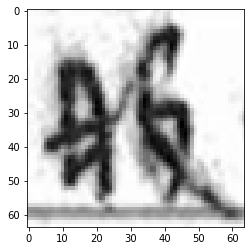

['醞' '酷' '醋' '酪' '酩' '醣' '醃' '醒' '酉' '酊']


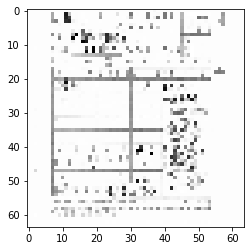

['蔓' '曼' '夢' '憲' '菱' '葬' '薯' '葦' '草' '蒙']


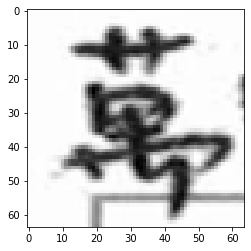

['退' '艮' '述' '迴' '遏' '迎' '迥' '迦' '違' '遇']


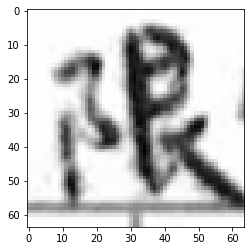

['軟' '車' '軾' '軼' '軛' '輒' '軌' '軒' '軸' '輔']


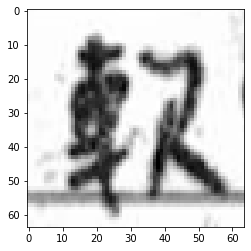

['甬' '令' '零' '予' '勇' '苓' '雯' '恿' '霎' '禽']


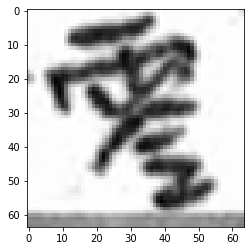

['梱' '困' '林' '楓' '桐' '欄' '植' '橡' '綑' '櫚']


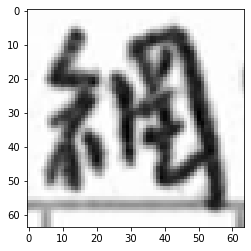

['趾' '躂' '蹉' '跋' '跪' '蹶' '踱' '跆' '路' '踟']


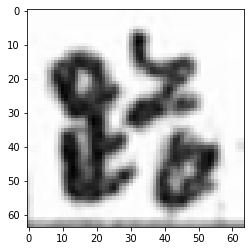

['星' '音' '普' '旦' '是' '章' '昔' '量' '書' '基']


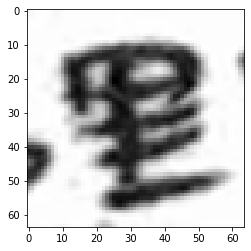

['紜' '私' '允' '弁' '魂' '云' '弘' '統' '去' '公']


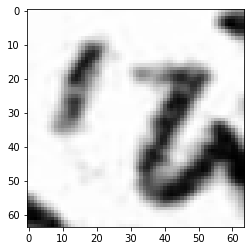

['甬' '令' '零' '予' '勇' '苓' '雯' '禽' '霎' '丙']


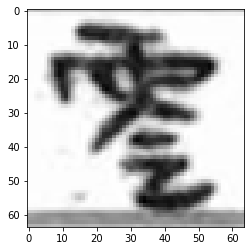

['刷' '划' '制' '刪' '剩' '刊' '刺' '刨' '剌' '列']


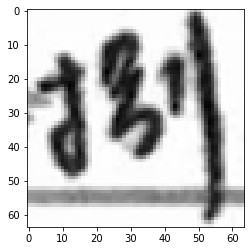

['雲' '雨' '需' '霽' '云' '霎' '雯' '羊' '童' '丙']


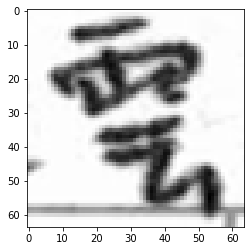

['直' '十' '士' '土' '矗' '真' '且' '固' '圭' '辛']


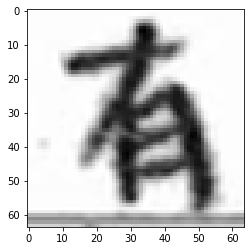

['貳' '或' '氛' '勻' '裁' '武' '氧' '鳶' '式' '氮']


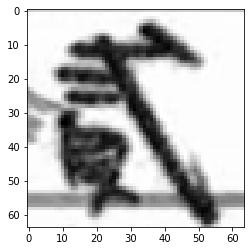

['川' '馴' '耳' '順' '甽' '訓' '圳' '聶' '釧' '聊']


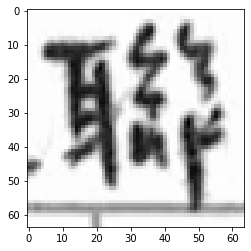

In [9]:
crops_path = glob('data/crop2/*.png')

imgs = []
raw_imgs = []
kernel = np.ones((2,2),np.uint8)

for path in crops_path:
    crop = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    raw_imgs.append(crop)
    
    # erosion & dilation
    erosion = cv2.erode(crop, kernel, iterations = 1)
    dilation = cv2.dilate(crop, kernel, iterations = 1)
    # erosion = cv2.medianBlur(crop, 3)

    resImg = cv2.resize(crop, (64,64), interpolation=cv2.INTER_CUBIC)
    imgs.append(resImg)
    


pred_y = infer(np.array(imgs))

pred_y = np.vstack(pred_y)
score = cosine_similarity(pred_y, Embedding.values.T)
top_score = score.argsort()[:,::-1][:,:10]

for idx, n in enumerate(pred_y):
    print(Embedding.columns[top_score][idx])
#     plt.imshow(raw_imgs[idx], cmap='gray')
#     plt.show()
    
    plt.imshow(imgs[idx], cmap='gray')
    plt.show()

['龍' '朧' '瓏' '聾' '隴' '寵' '矓' '攏' '壟' '籠']


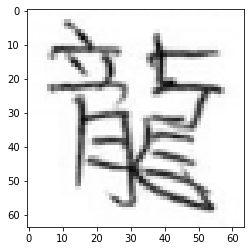

['寸' '奪' '導' '尊' '寺' '專' '守' '辱' '轟' '車']


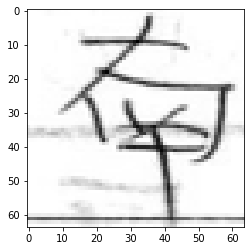

['台' '牟' '公' '么' '矣' '口' '怠' '去' '允' '弁']


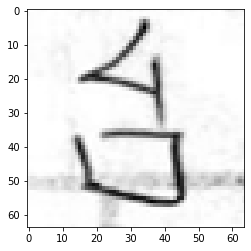

['恩' '心' '思' '惡' '因' '惑' '志' '忠' '慼' '愚']


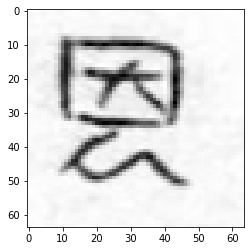

['短' '殊' '豌' '銖' '蛛' '株' '珠' '硃' '頭' '誅']


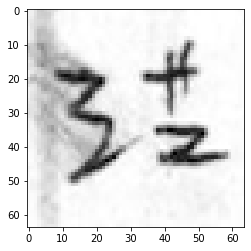

['湮' '濛' '汪' '洋' '潭' '漠' '漂' '浬' '灌' '注']


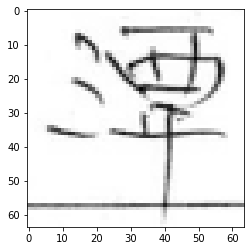

['國' '囤' '圃' '因' '困' '四' '回' '圖' '團' '固']


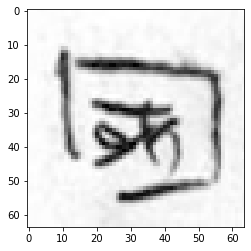

In [10]:
crops_path = glob('data/crop/*.png')

imgs = []
raw_imgs = []
kernel = np.ones((2,2),np.uint8)

for path in crops_path:
    crop = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    raw_imgs.append(crop)
    
    # erosion & dilation
    erosion = cv2.erode(crop, kernel, iterations = 1)
    dilation = cv2.dilate(crop, kernel, iterations = 1)
    # erosion = cv2.medianBlur(crop, 3)

    resImg = cv2.resize(crop, (64,64), interpolation=cv2.INTER_CUBIC)
    imgs.append(resImg)
    


pred_y = infer(np.array(imgs))

pred_y = np.vstack(pred_y)
score = cosine_similarity(pred_y, Embedding.values.T)
top_score = score.argsort()[:,::-1][:,:10]

for idx, n in enumerate(pred_y):
    print(Embedding.columns[top_score][idx])
#     plt.imshow(raw_imgs[idx], cmap='gray')
#     plt.show()
    
    plt.imshow(imgs[idx], cmap='gray')
    plt.show()